#### Image Patch Extraction from Input WSIs (H&E or mIF)
This is a demo for WSIPatchExtract custom class for extracting image patches from input WSIs. \
This demo includes the image patch extraction from the entire WSIs and manual selected ROIs from WSIs.

In [21]:
from pathlib import Path
import os
import sys

module_path = str(Path().resolve().parents[1])
sys.path.insert(0, module_path)

import PIL
import numpy as np
from gbm.src.data_module.components.extract_wsi_patches import (
    WSIPatchExtract,
    ROIPatchExtract
)

##### Image Patch Extraction from the Entire WSIs

In [22]:
he_wsi_dir = "/Users/qgu/Library/CloudStorage/OneDrive-InsideMDAnderson/Research/gbm/example_data/\
dataset_2/gbm_tmpil_040.svs"
mif_wsi_dir = "/Users/qgu/Library/CloudStorage/OneDrive-InsideMDAnderson/Research/gbm/example_data/\
dataset_2/S12-090004.qptiff"
assert os.path.exists(he_wsi_dir), "Example H&E WSI is not existed"
assert os.path.exists(mif_wsi_dir), "Example mIF WSI is not existed"

In [34]:
he_patch_output_dir = "/Users/qgu/OneDrive/Research/gbm/test/wsi/test_he_patch_extract_dir"
mif_patch_output_dir = "/Users/qgu/OneDrive/Research/gbm/test/wsi/est_mif_patch_extract_dir"

In [35]:
HEPatchExtractor = WSIPatchExtract(
    thumbnail_width=200,
    patch_level=0,
    max_patch_size=256,
    tissue_area_threshold=0,
)
mIFPatchExtractor = WSIPatchExtract(
    thumbnail_width=200,
    patch_level=0,
    max_patch_size=256,
    tissue_area_threshold=0,
)

In [36]:
he_wsi, he_top_level, he_thumbnail = HEPatchExtractor._get_wsi_thumbnail(he_wsi_dir)
mif_wsi, mif_top_level, mif_thumbnail = mIFPatchExtractor._get_wsi_thumbnail(mif_wsi_dir)

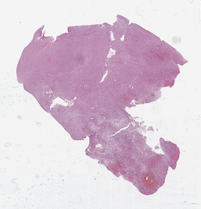

In [37]:
he_thumbnail

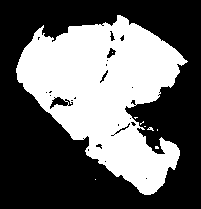

In [38]:
he_binary_img = HEPatchExtractor._get_otsu_binary_img(he_thumbnail)
PIL.Image.fromarray(np.uint8(he_binary_img * 255))

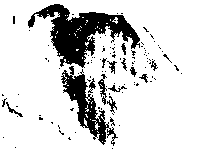

In [39]:
mif_binary_img = mIFPatchExtractor._get_otsu_binary_img(mif_thumbnail)
PIL.Image.fromarray(np.uint8(mif_binary_img * 255))

In [40]:
HEPatchExtractor.forward(he_wsi_dir, he_patch_output_dir)
mIFPatchExtractor.forward(mif_wsi_dir, mif_patch_output_dir)

In [42]:
he_example_patch_npy = np.load(
    f"{he_patch_output_dir}/gbm_tmpil_040/gbm_tmpil_040_level_0_x_1536_y_5376.npy"
)
he_example_patch_npy.shape

(256, 256, 4)

In [54]:
mif_example_patch_npy = np.load(
    f"{mif_patch_output_dir}/S12-090004/S12-090004_level_0_x_1536_y_5376.npy"
)
mif_example_patch_npy[:, :, :2].shape

(256, 256, 2)

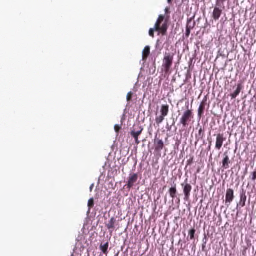

In [57]:
PIL.Image.fromarray(np.uint8(he_example_patch_npy))

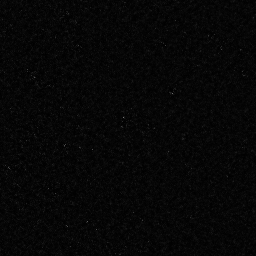

In [55]:
PIL.Image.fromarray(np.uint8(mif_example_patch_npy[:, :, :3]))

##### Image Patch Extraction from Manual Selected ROIs from WSIs

In [2]:
he_roi_dir = "/Users/qgu/Library/CloudStorage/OneDrive-InsideMDAnderson/Research/gbm/example_data/\
dataset_1/s338_c014_v001_r001_reg008_HE_aligned.tif"
mif_roi_dir = "/Users/qgu/Library/CloudStorage/OneDrive-InsideMDAnderson/Research/gbm/example_data/\
dataset_1/s338_c014_v001_r001_reg008.tiff"
assert os.path.exists(he_roi_dir), "Example H&E WSI ROI is not existed"
assert os.path.exists(mif_roi_dir), "Example mIF WSI ROI is not existed"

In [3]:
he_roi_patch_output_dir = "/Users/qgu/OneDrive/Research/gbm/test/roi/test_he_patch_extract_dir"
mif_roi_patch_output_dir = "/Users/qgu/OneDrive/Research/gbm/test/roi/test_mif_patch_extract_dir"

In [47]:
HEROIPatchExtract = ROIPatchExtract(
    thumbnail_width=200,
    max_patch_size=256
)
mIFROIPatchExtract = ROIPatchExtract(
    thumbnail_width=200,
    max_patch_size=256
)

In [48]:
he_roi, he_roi_thumbnail = HEROIPatchExtract._get_roi_thumbnail(he_roi_dir)
mif_roi, mif_roi_thumbnail = mIFROIPatchExtract._get_roi_thumbnail(mif_roi_dir)

In [49]:
assert he_roi.size == mif_roi.size, "H&E and mIF ROI Image size should be the same."

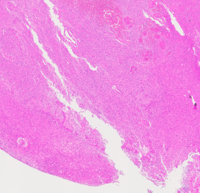

In [50]:
he_roi_thumbnail

In [51]:
mif_roi_thumbnail

'thumbnail image is not supported when input image mode is I;16B'

In [8]:
HEROIPatchExtract.forward(he_roi_dir, he_roi_patch_output_dir)
mIFROIPatchExtract.forward(mif_roi_dir, mif_roi_patch_output_dir)

In [15]:
he_roi_example_patch_npy = np.load(
    f"{he_roi_patch_output_dir}/s338_c014_v001_r001_reg008_HE_aligned/\
s338_c014_v001_r001_reg008_HE_aligned_roi__x_0_y_0.npy"
)
he_roi_example_patch_npy.shape

(256, 256, 3)

In [52]:
mif_roi_example_patch_npy = np.load(
    f"{mif_roi_patch_output_dir}/s338_c014_v001_r001_reg008/\
s338_c014_v001_r001_reg008_roi__x_0_y_0.npy"
)
mif_roi_example_patch_npy.shape

(256, 256)

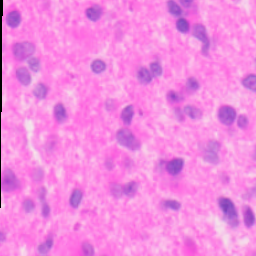

In [56]:
PIL.Image.fromarray(np.uint8(he_roi_example_patch_npy))

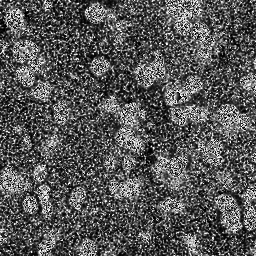

In [53]:
PIL.Image.fromarray(np.uint8(mif_roi_example_patch_npy))